In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

In [2]:
xls = pd.ExcelFile('../../../data/raw/partner_i/Dados Históricos - partner_i.xlsx', engine='openpyxl')

In [3]:
xls.sheet_names

['Descrição dados cimento',
 'Descrição dados clinquer',
 'Clinquer 2',
 'Clinquer 1',
 'CPIIE40',
 'CPIIF40']

In [4]:
df_desc_cement = pd.read_excel(xls, 'Descrição dados cimento')

In [5]:
df_desc_cement

,Ensaio,Unidade,Descrição
0,R3D,Mpa,Resistência a compressão a 3 dias
1,R7D,Mpa,Resistência a compressão a 7 dias
2,R28D,Mpa,Resistência a compressão a 28 dias
3,IP,min,Início de pega
4,FP,min,Final de pega
5,FALSAP,mm,Falsa pega dada em mm. Valores normais acima d...
6,AE1D,kg cim / Mpa,Consumo de cimento para incremento de 1MPa a 1...
7,AE7D,kg cim / Mpa,Consumo de cimento para incremento de 1MPa a 7...
8,AE28D,kg cim / Mpa,Consumo de cimento para incremento de 1MPa a 2...
9,#200,%,% de massa retida acima de 75 µm


# Exploratory Data Analyses - EDA - Cement CPIIF40

<h2>Shape, feature information and some samples</h2>

In [6]:
df = pd.read_excel(xls, 'CPIIF40')

In [7]:
df.shape

(415, 46)

In [8]:
df.head()

,Data/Hora,R3D,R7D,R28D,IP,FP,FALSAP,AE1D,AE7D,AE28D,...,DOLOMITA,MGO,ARCANITA,K2O,NA2O,TIO2,MN2O3,FLUORITA,MUSCOVITA,CAOL DRX
0,2019-01-03,39.9,42.8,47.2,210,290,38,-,-,-,...,-,5.25,-,0.79,0.11,0.22,0.12,-,-,-
1,2019-01-05,38.8,42.3,48,195,315,36,26.1,12.6,10.7,...,0,5.13,0.58,0.78,0.11,0.21,0.12,0.24,0.16,0.74
2,2019-01-08,38.8,44.4,52.3,195,290,38,24,11.8,10.3,...,1.08,5.22,0,0.79,0.11,0.21,0.13,0,0.15,2
3,2019-01-10,38.5,42.2,47.7,195,270,36,-,-,-,...,1.44,5.38,0,0.78,0.11,0.22,0.13,0,0.12,1.06
4,2019-01-12,37.9,42.5,48.4,205,270,37,-,-,-,...,0,5.58,0.71,0.82,0.12,0.21,0.13,0.08,0.11,0.85


In [9]:
df = pd.read_excel(xls, 'CPIIF40', na_values='-')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data/Hora     415 non-null    datetime64[ns]
 1   R3D           386 non-null    float64       
 2   R7D           379 non-null    float64       
 3   R28D          343 non-null    float64       
 4   IP            379 non-null    float64       
 5   FP            379 non-null    float64       
 6   FALSAP        95 non-null     float64       
 7   AE1D          70 non-null     float64       
 8   AE7D          53 non-null     float64       
 9   AE28D         67 non-null     float64       
 10  #200          379 non-null    float64       
 11  #325          379 non-null    float64       
 12  #400          379 non-null    float64       
 13  BL            379 non-null    float64       
 14  RI            384 non-null    float64       
 15  PF            354 non-null    float64   

In [11]:
df.head()

,Data/Hora,R3D,R7D,R28D,IP,FP,FALSAP,AE1D,AE7D,AE28D,...,DOLOMITA,MGO,ARCANITA,K2O,NA2O,TIO2,MN2O3,FLUORITA,MUSCOVITA,CAOL DRX
0,2019-01-03,39.900002,42.799999,47.200001,210.0,290.0,38.0,NaN,NaN,NaN,...,NaN,5.25,NaN,0.79,0.11,0.22,0.12,NaN,NaN,NaN
1,2019-01-05,38.799999,42.299999,48.000000,195.0,315.0,36.0,26.1,12.6,10.7,...,0.00,5.13,0.58,0.78,0.11,0.21,0.12,0.24,0.16,0.74
2,2019-01-08,38.799999,44.400002,52.299999,195.0,290.0,38.0,24.0,11.8,10.3,...,1.08,5.22,0.00,0.79,0.11,0.21,0.13,0.00,0.15,2.00
3,2019-01-10,38.500000,42.200001,47.700001,195.0,270.0,36.0,NaN,NaN,NaN,...,1.44,5.38,0.00,0.78,0.11,0.22,0.13,0.00,0.12,1.06
4,2019-01-12,37.900002,42.500000,48.400002,205.0,270.0,37.0,NaN,NaN,NaN,...,0.00,5.58,0.71,0.82,0.12,0.21,0.13,0.08,0.11,0.85


In [12]:
df.tail()

,Data/Hora,R3D,R7D,R28D,IP,FP,FALSAP,AE1D,AE7D,AE28D,...,DOLOMITA,MGO,ARCANITA,K2O,NA2O,TIO2,MN2O3,FLUORITA,MUSCOVITA,CAOL DRX
410,2021-11-02,36.500000,41.400002,NaN,215.0,270.0,NaN,NaN,NaN,NaN,...,0.04,6.05,0.40,0.88,0.10,0.21,0.14,0.0,NaN,0.13
411,2021-11-04,36.099998,40.000000,NaN,170.0,220.0,NaN,NaN,NaN,NaN,...,0.00,5.84,0.66,0.87,0.09,0.21,0.13,0.0,NaN,0.07
412,2021-11-06,34.000000,NaN,NaN,195.0,240.0,NaN,NaN,NaN,NaN,...,0.04,5.89,1.02,0.87,0.09,0.21,0.13,0.0,NaN,0.11
413,2021-11-09,NaN,NaN,NaN,175.0,240.0,NaN,NaN,NaN,NaN,...,0.00,5.89,0.73,0.87,0.09,0.21,0.13,0.0,NaN,0.17
414,2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.97,NaN,0.86,0.09,0.21,0.14,NaN,NaN,NaN


<h2>1. Structure Investigation</h2>

In [13]:
df.dtypes.value_counts()

float64           45
datetime64[ns]     1
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R3D,386.0,37.431088,1.869111,32.500000,36.099998,37.400002,38.599998,43.200001
R7D,379.0,42.143799,1.750913,37.799999,40.900002,42.099998,43.250000,49.099998
R28D,343.0,49.162391,1.976163,43.700001,47.650000,49.000000,50.450001,55.299999
IP,379.0,201.055409,24.057792,110.000000,180.000000,200.000000,220.000000,275.000000
FP,379.0,274.340369,34.190762,190.000000,250.000000,270.000000,295.000000,430.000000
FALSAP,95.0,37.631579,3.358231,17.000000,37.000000,38.000000,40.000000,40.000000
AE1D,70.0,23.184286,2.277211,19.299999,21.725000,22.700001,24.175001,31.400000
AE7D,53.0,12.703774,1.029556,10.800000,12.100000,12.700000,13.100000,17.299999
AE28D,67.0,10.858209,0.677596,9.400000,10.350000,10.800000,11.200000,13.300000
#200,379.0,0.011583,0.031093,0.000000,0.000000,0.000000,0.010000,0.430000


<h3>1.2 Structure of Non-Numeric features</h3>

In [15]:
df.describe(exclude='number').T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Data/Hora,415,415,2019-02-21,1,2019-01-03,2021-11-11


<h2>2. Quality Investigation</h2>

<AxesSubplot:title={'center':'Unique Values per feature'}>

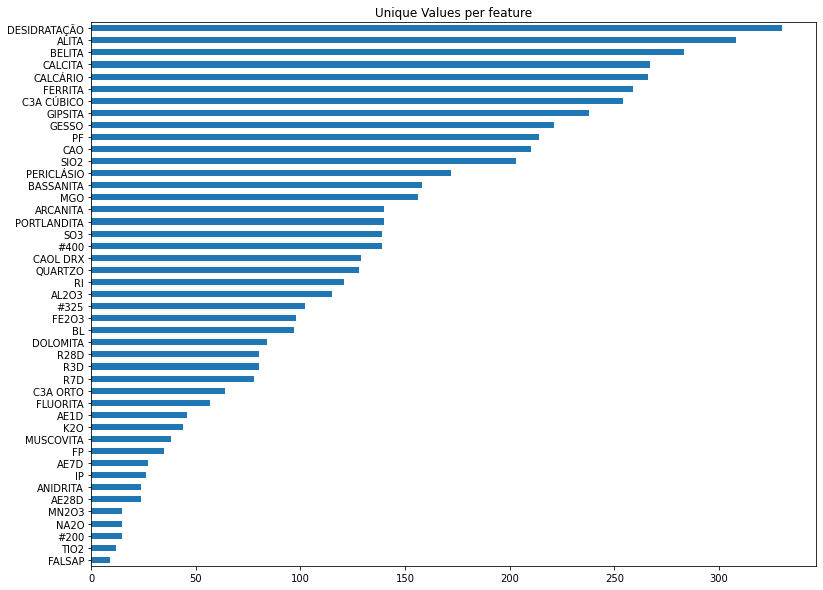

In [16]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0]), [Text(0, 0, 'Data/Hora')])

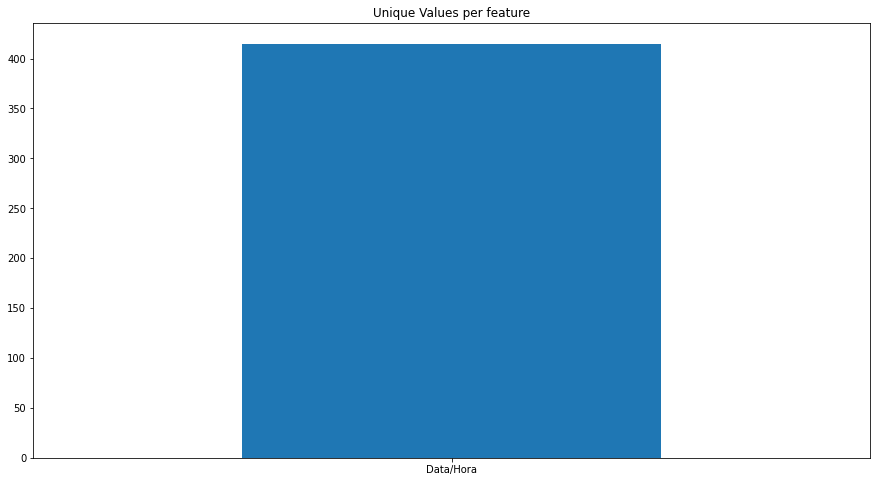

In [17]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [18]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 45 variables with missing values from a total of 46


In [19]:
df.isna().any()

Data/Hora       False
R3D              True
R7D              True
R28D             True
IP               True
FP               True
FALSAP           True
AE1D             True
AE7D             True
AE28D            True
#200             True
#325             True
#400             True
BL               True
RI               True
PF               True
CALCÁRIO         True
SO3              True
GESSO            True
DESIDRATAÇÃO     True
GIPSITA          True
BASSANITA        True
PORTLANDITA      True
ALITA            True
BELITA           True
C3A ORTO         True
C3A CÚBICO       True
CALCITA          True
CAO              True
QUARTZO          True
SIO2             True
AL2O3            True
FERRITA          True
FE2O3            True
PERICLÁSIO       True
ANIDRITA         True
DOLOMITA         True
MGO              True
ARCANITA         True
K2O              True
NA2O             True
TIO2             True
MN2O3            True
FLUORITA         True
MUSCOVITA        True
CAOL DRX  

In [20]:
df.isna().sum()

Data/Hora         0
R3D              29
R7D              36
R28D             72
IP               36
FP               36
FALSAP          320
AE1D            345
AE7D            362
AE28D           348
#200             36
#325             36
#400             36
BL               36
RI               31
PF               61
CALCÁRIO         47
SO3              41
GESSO            47
DESIDRATAÇÃO     47
GIPSITA          49
BASSANITA        49
PORTLANDITA      49
ALITA            46
BELITA           48
C3A ORTO         48
C3A CÚBICO       49
CALCITA          49
CAO              41
QUARTZO          49
SIO2             41
AL2O3            41
FERRITA          48
FE2O3            41
PERICLÁSIO       48
ANIDRITA        149
DOLOMITA         48
MGO              41
ARCANITA         48
K2O              41
NA2O             41
TIO2             41
MN2O3            41
FLUORITA         64
MUSCOVITA       263
CAOL DRX         48
dtype: int64

In [21]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  3523 missing values.


/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

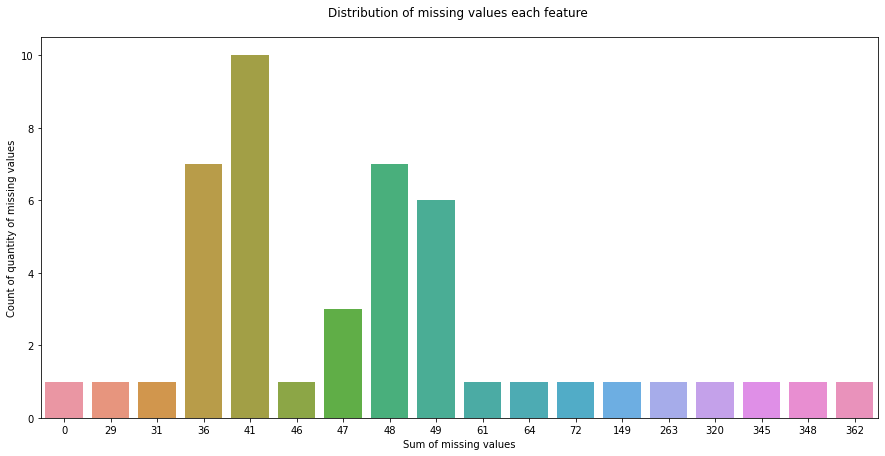

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(df.isna().sum())
plt.title('Distribution of missing values each feature \n')
plt.xlabel('Sum of missing values')
plt.ylabel('Count of quantity of missing values')

<BarContainer object of 46 artists>

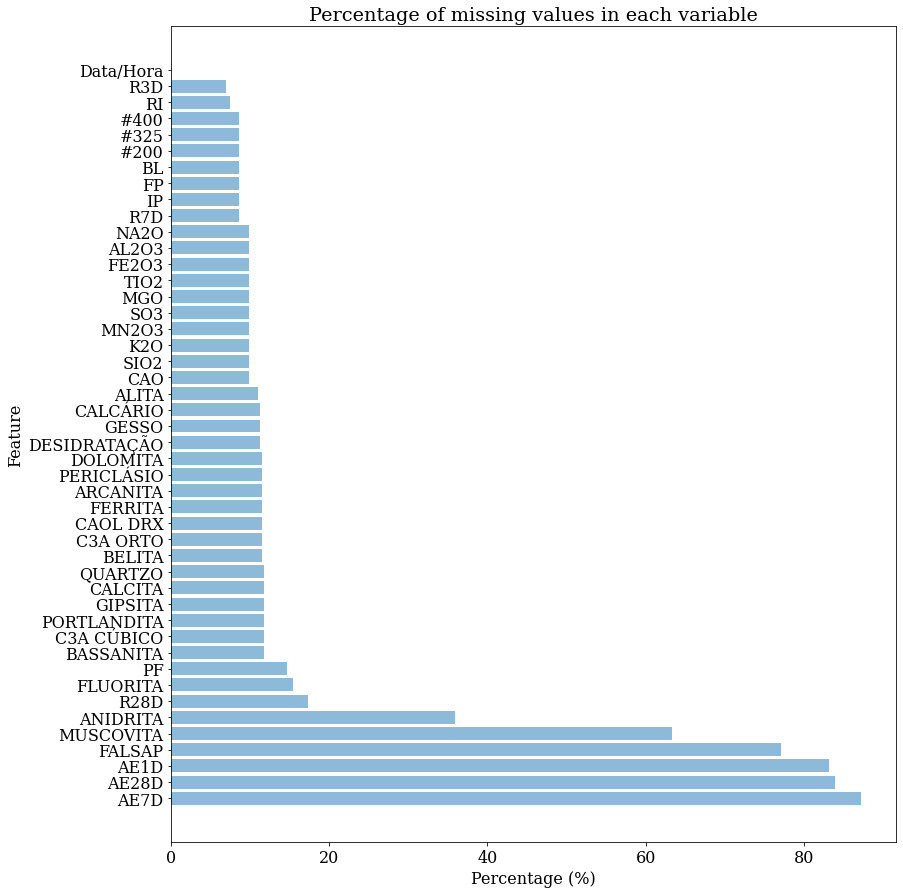

In [23]:
miss_perc = df.isnull().sum()/df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(13,15))
plt.title('Percentage of missing values in each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

<BarContainer object of 46 artists>

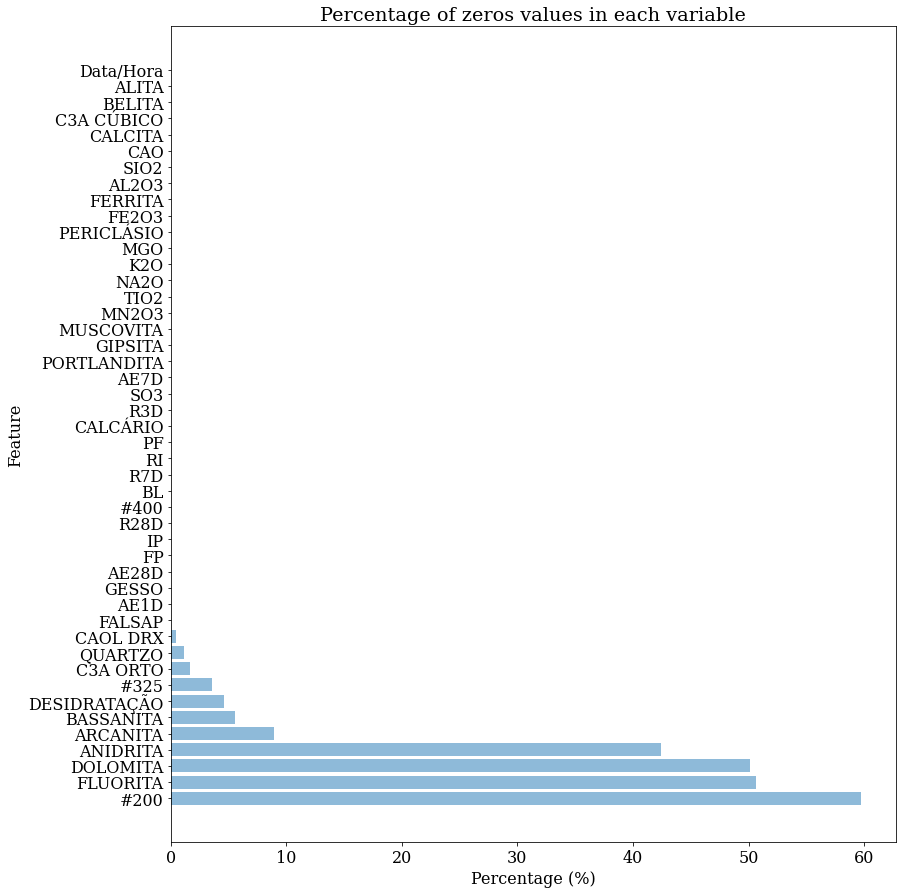

In [24]:
zeros_perc = (df == 0).sum(axis=0)/df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(13,15))
plt.title('Percentage of zeros values in each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [25]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [26]:
n_duplicates = df.drop('Data/Hora', axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 13 duplicates samples.


<h2>3. Content Investigation</h2>

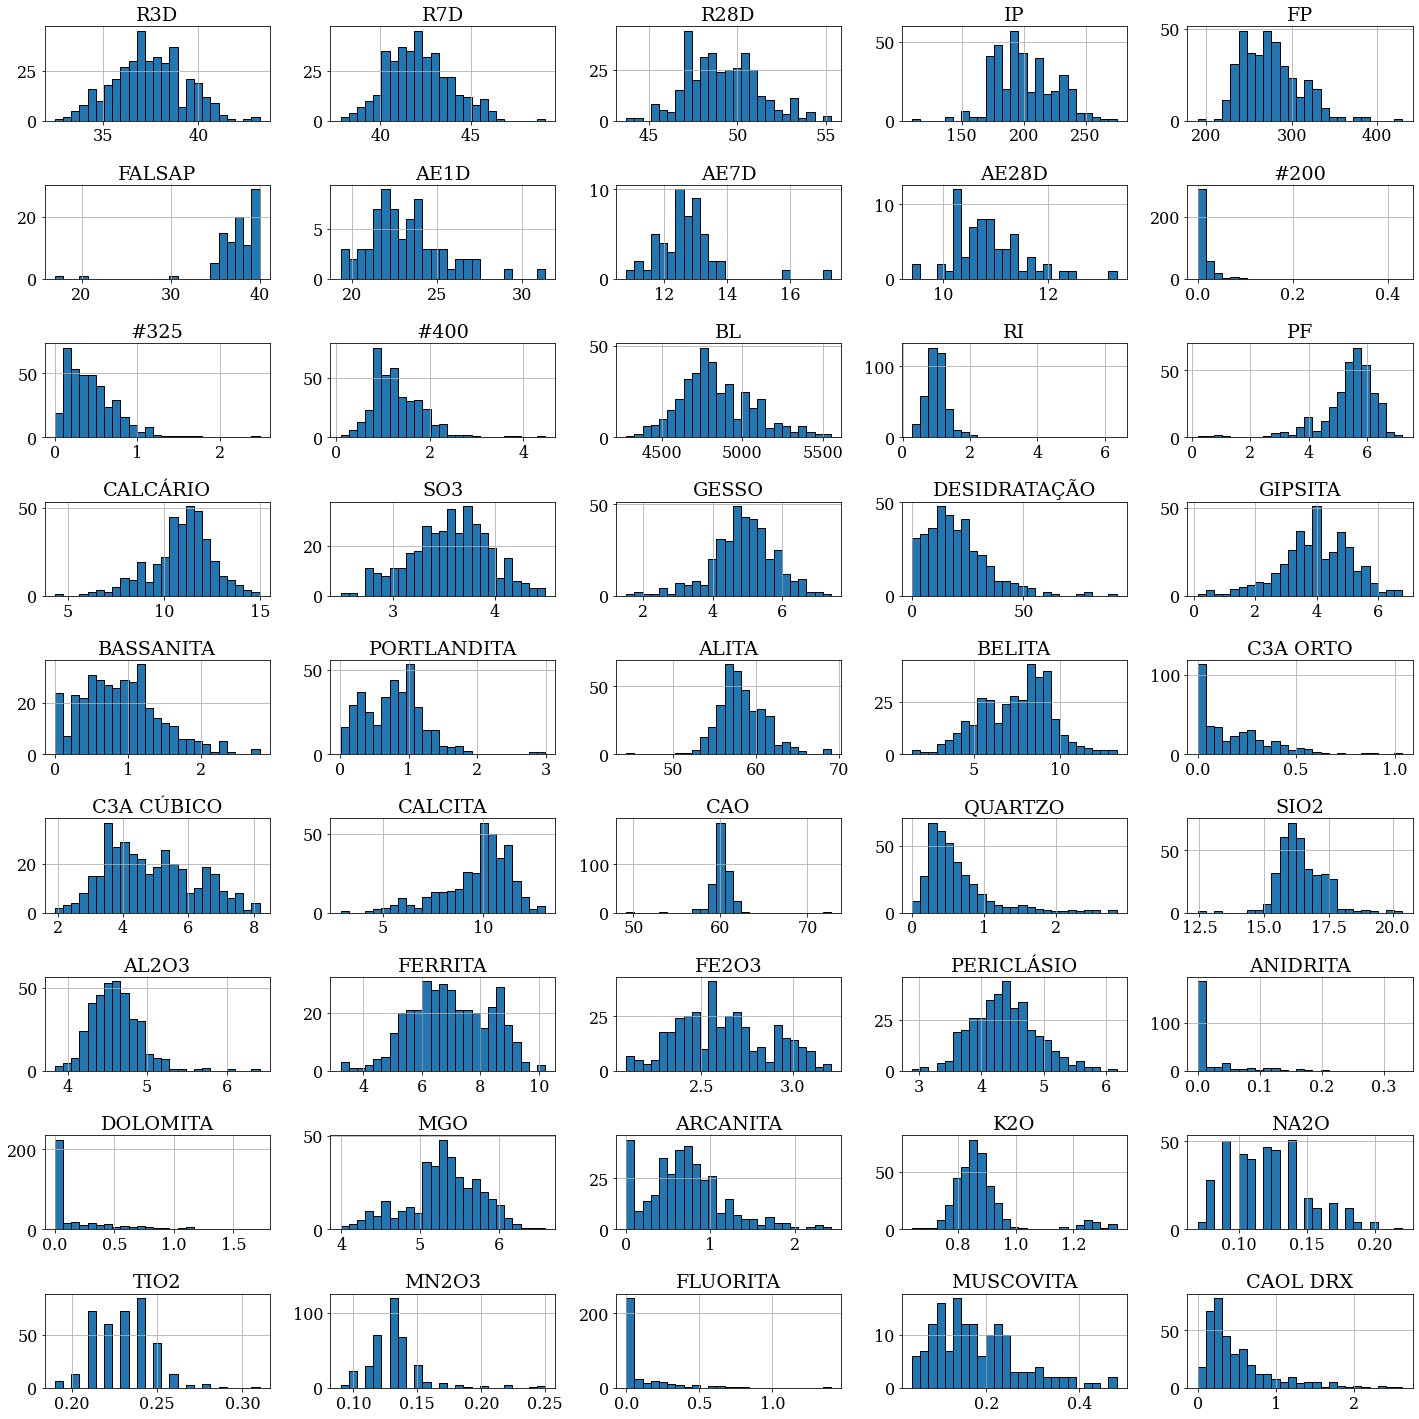

In [27]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor='black')
plt.tight_layout()

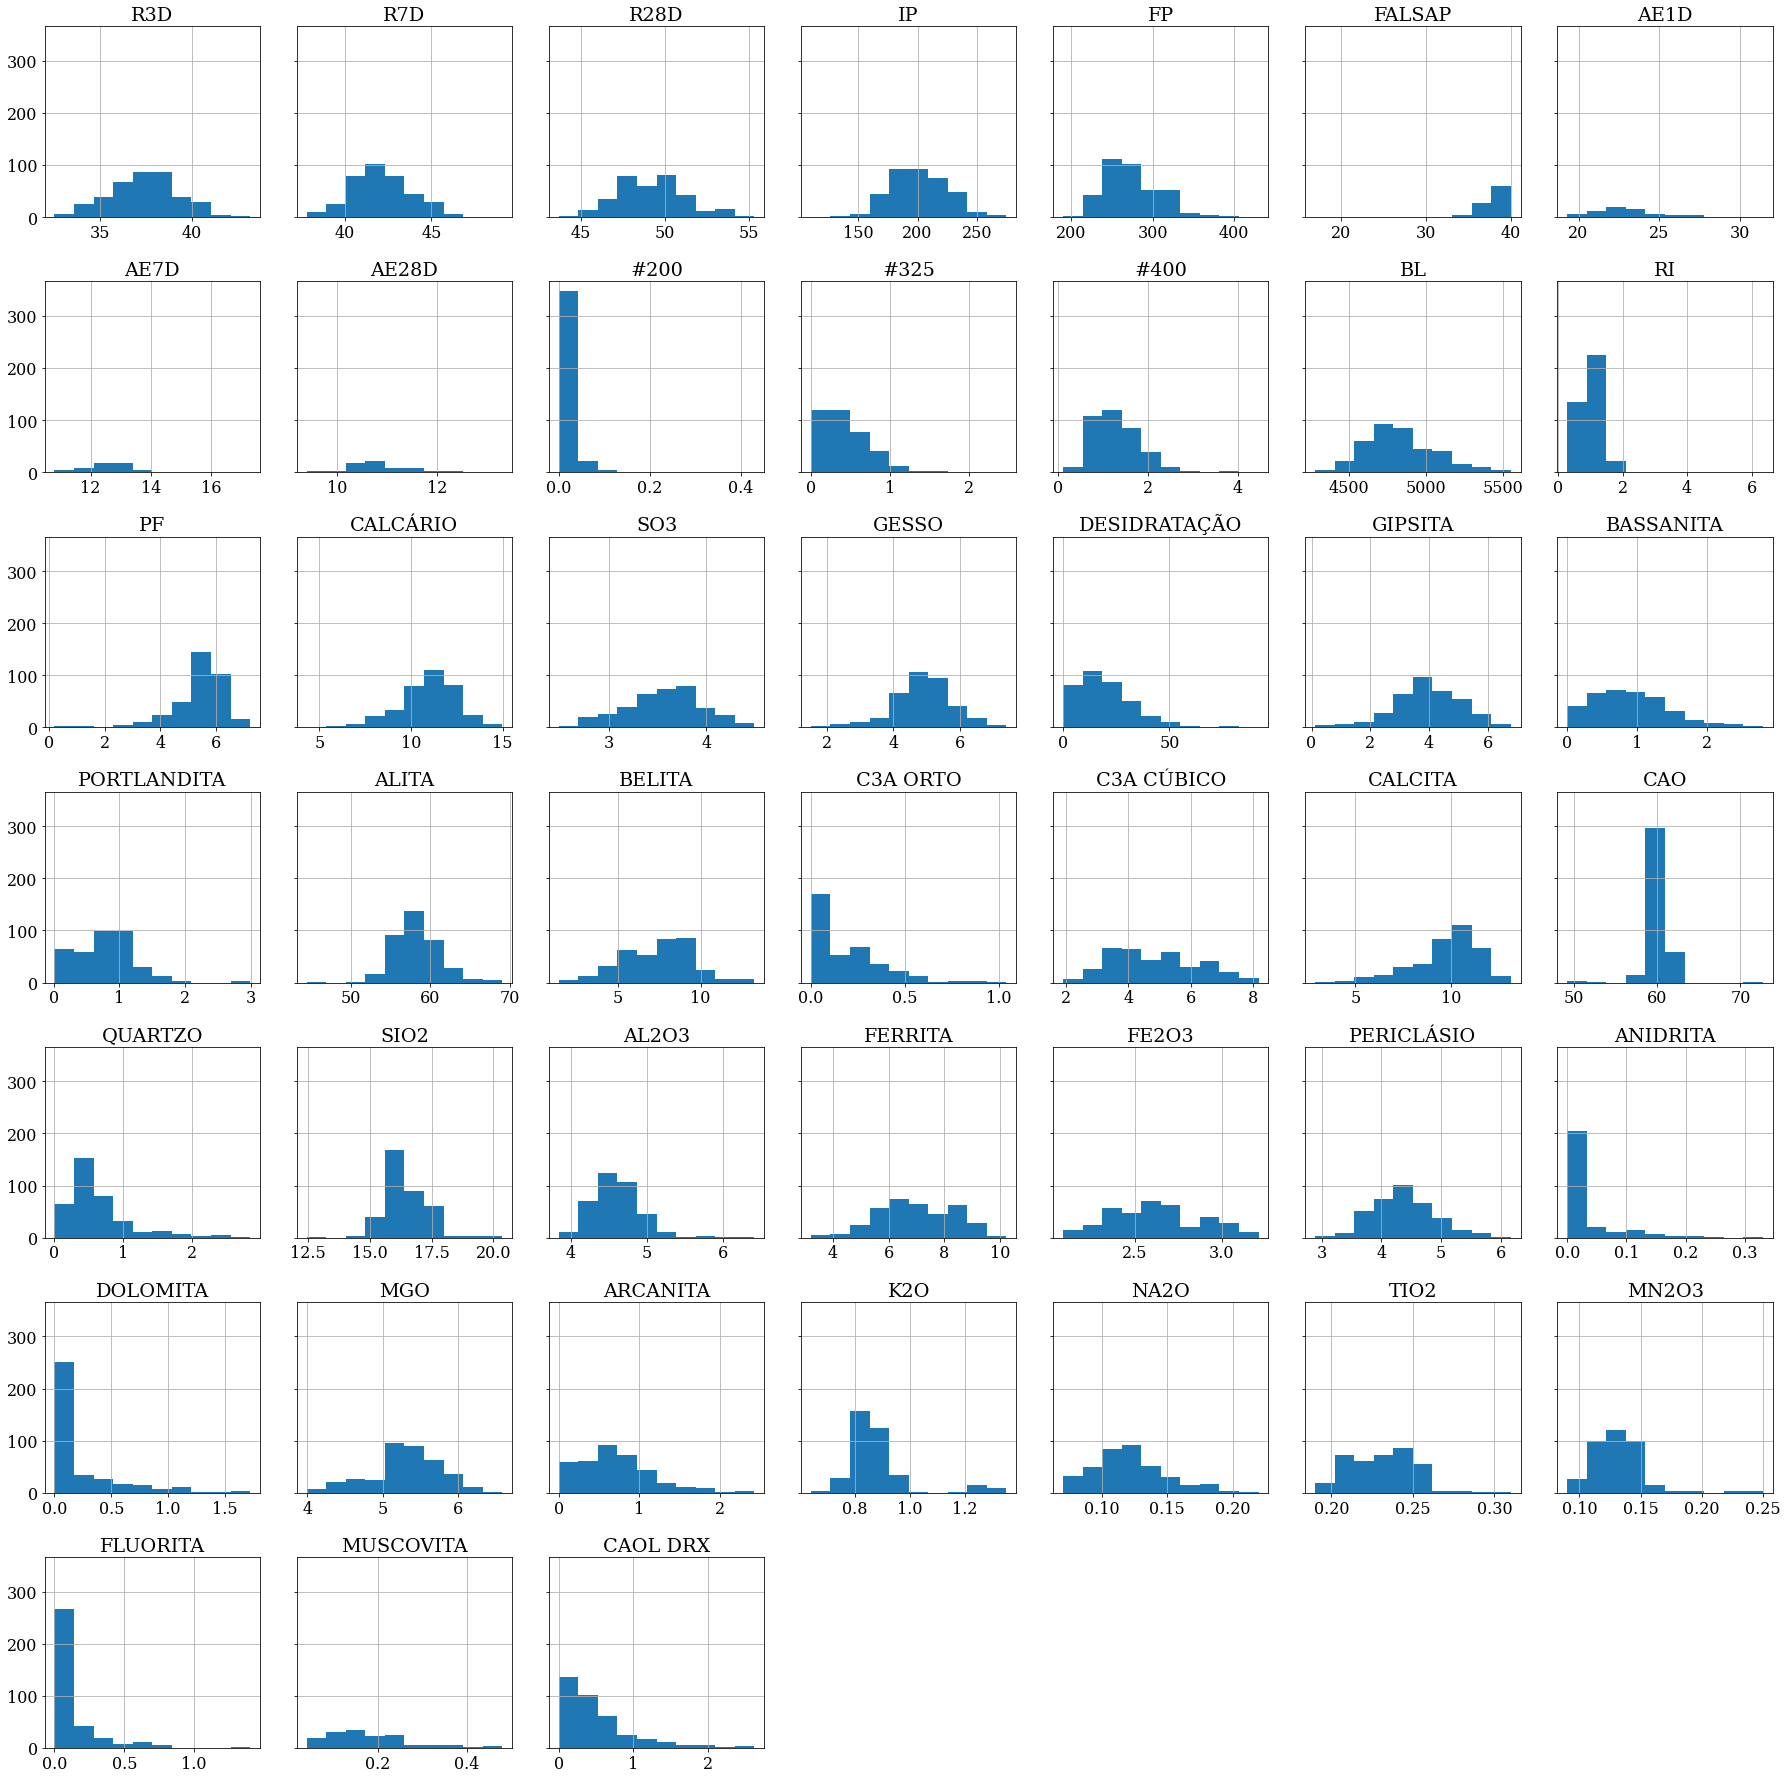

In [28]:
df.select_dtypes(include='float64').hist(figsize=(25, 25), sharey=True);
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

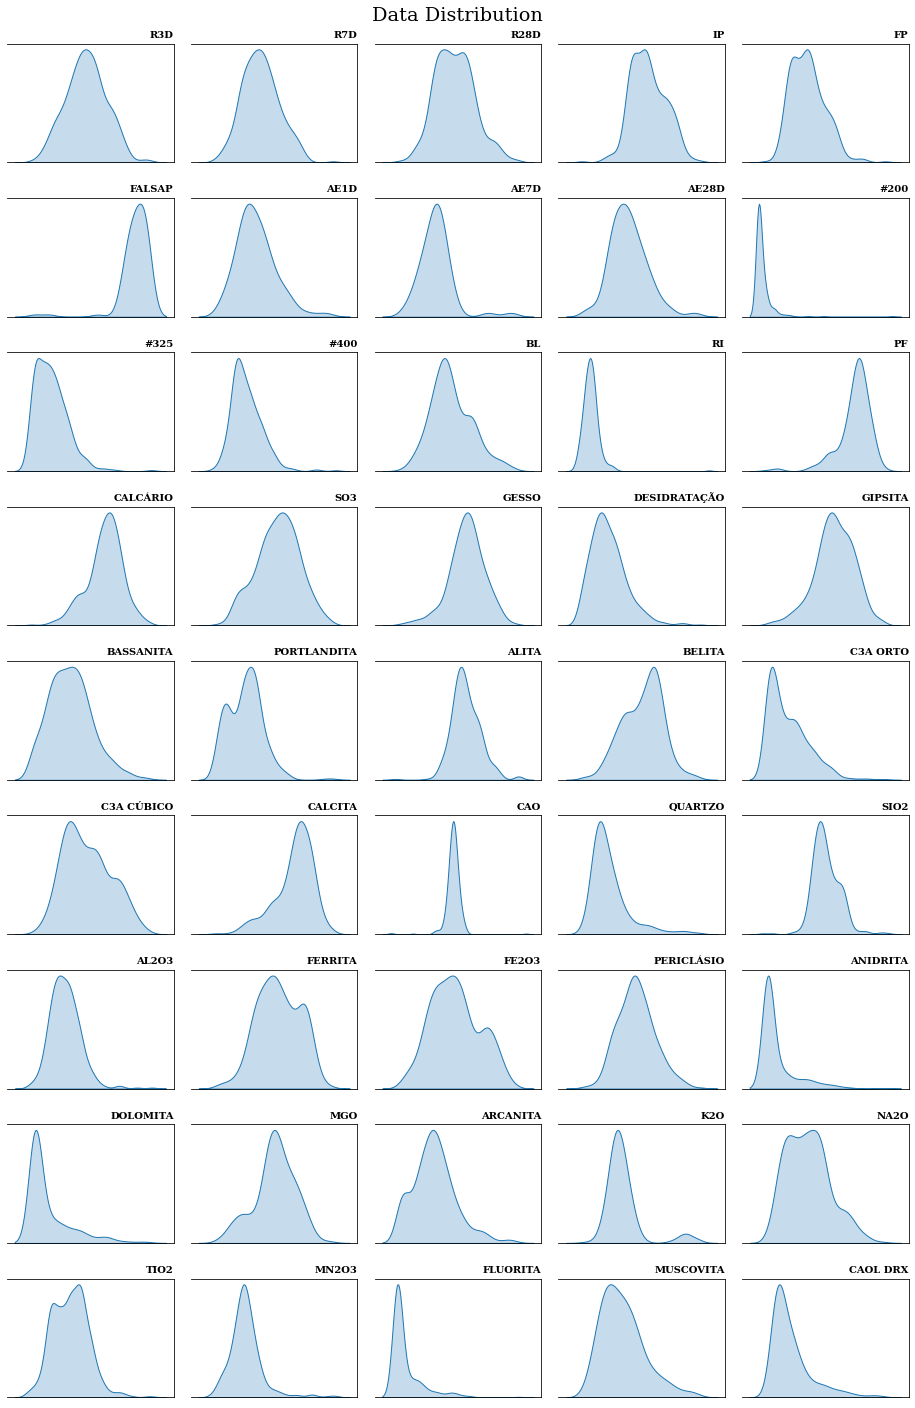

In [29]:
fig, axes = plt.subplots(9, 5,figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle('Data Distribution')

fig.tight_layout()
plt.show()

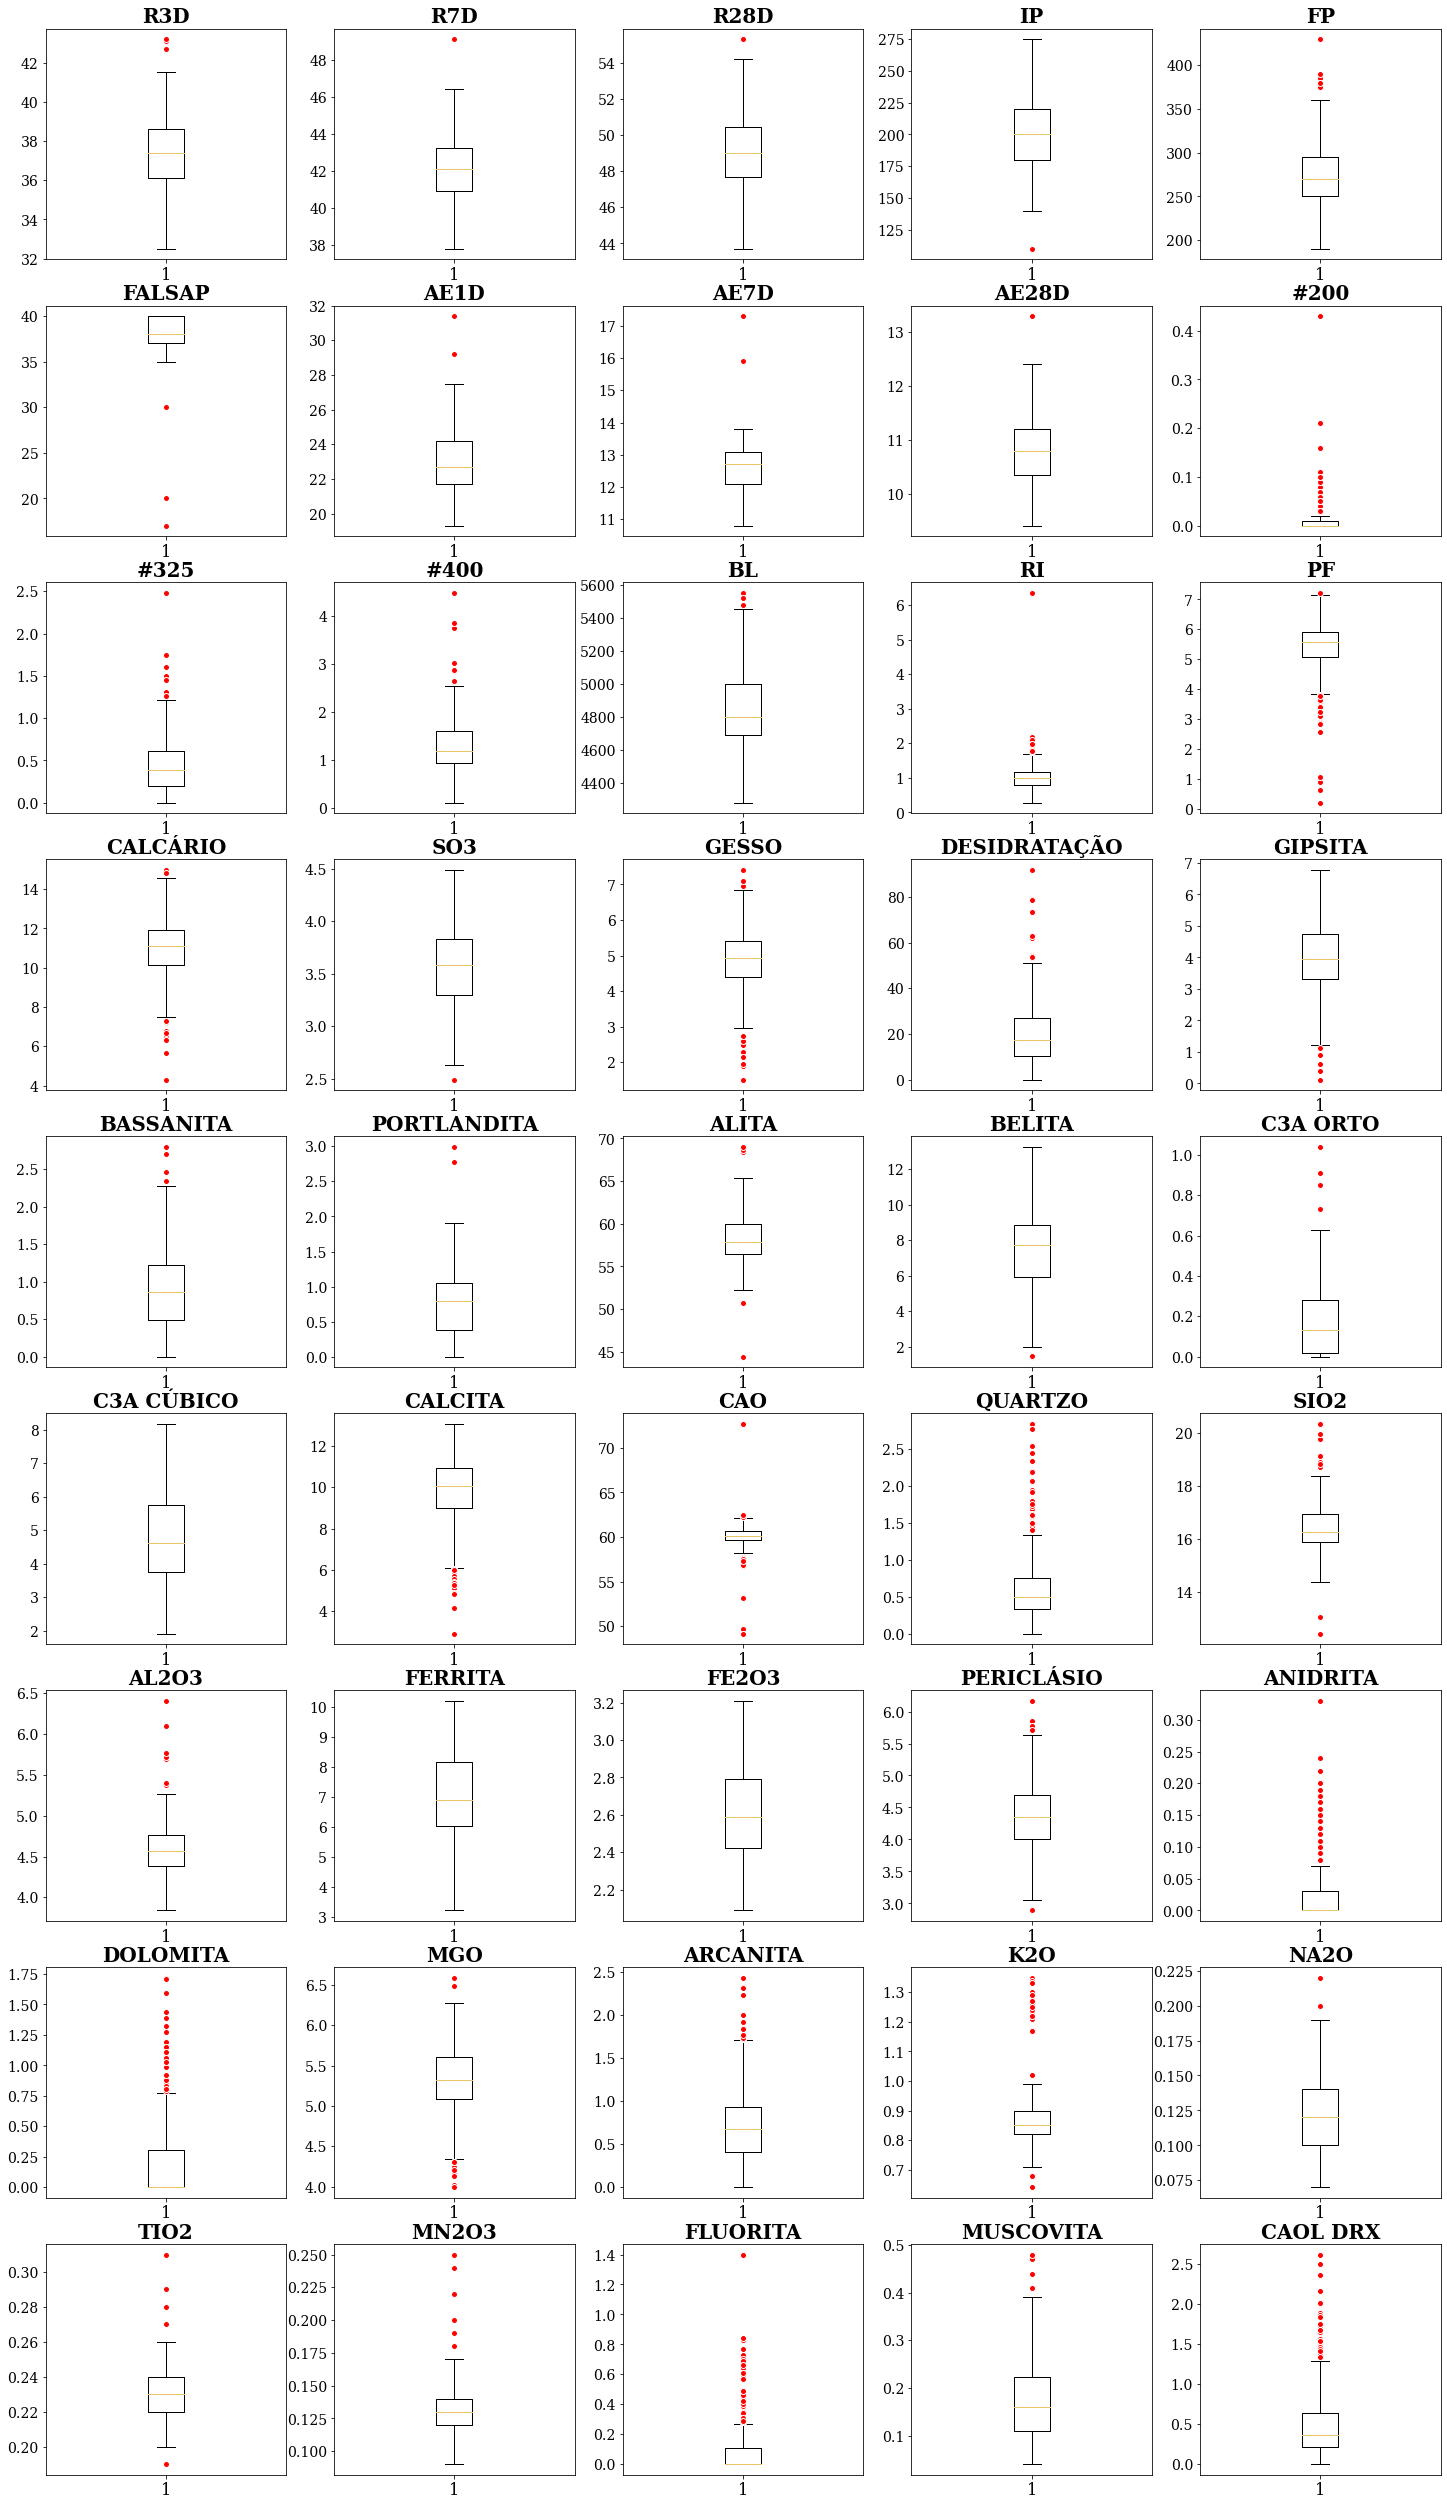

In [30]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(9, 5, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h3>Correlation Matrix heatmap</h3>

<AxesSubplot:>

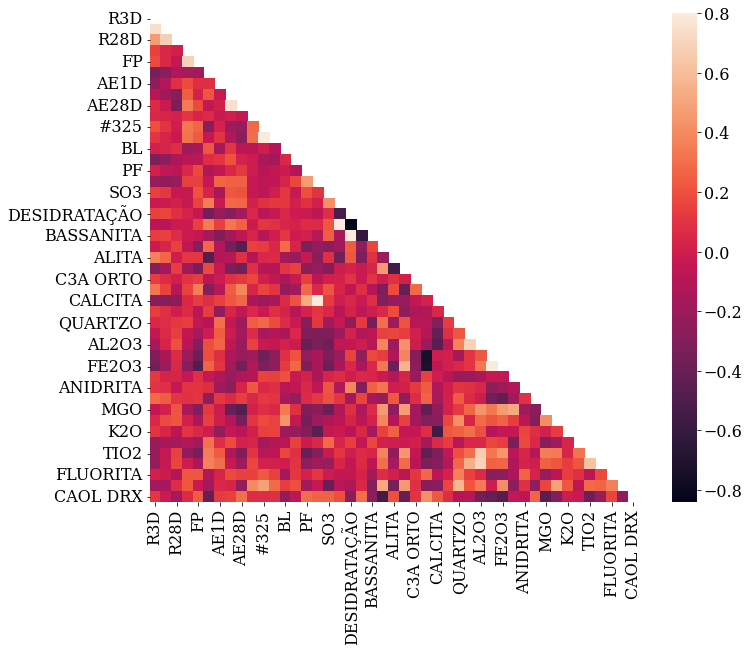

In [31]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, mask=mask, vmax=.8, square=True)

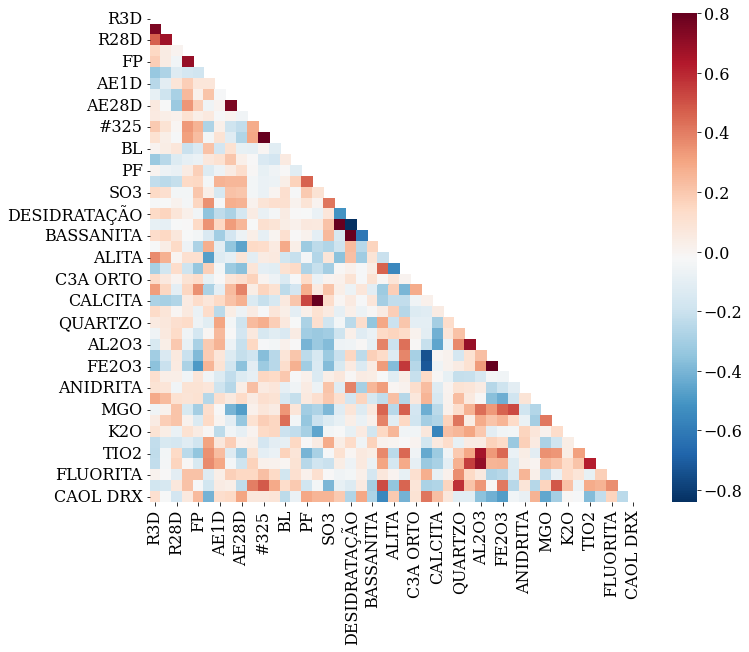

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, cmap='RdBu_r', mask=mask, vmax=.8, square=True)
plt.show()

<AxesSubplot:>

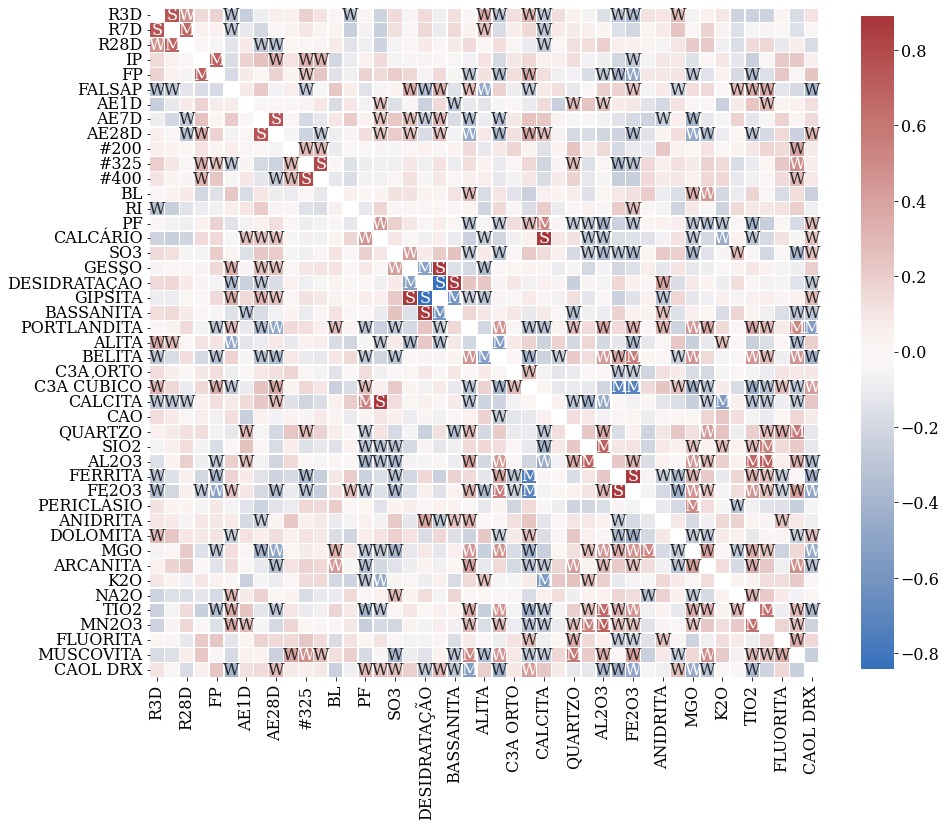

In [33]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) > 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

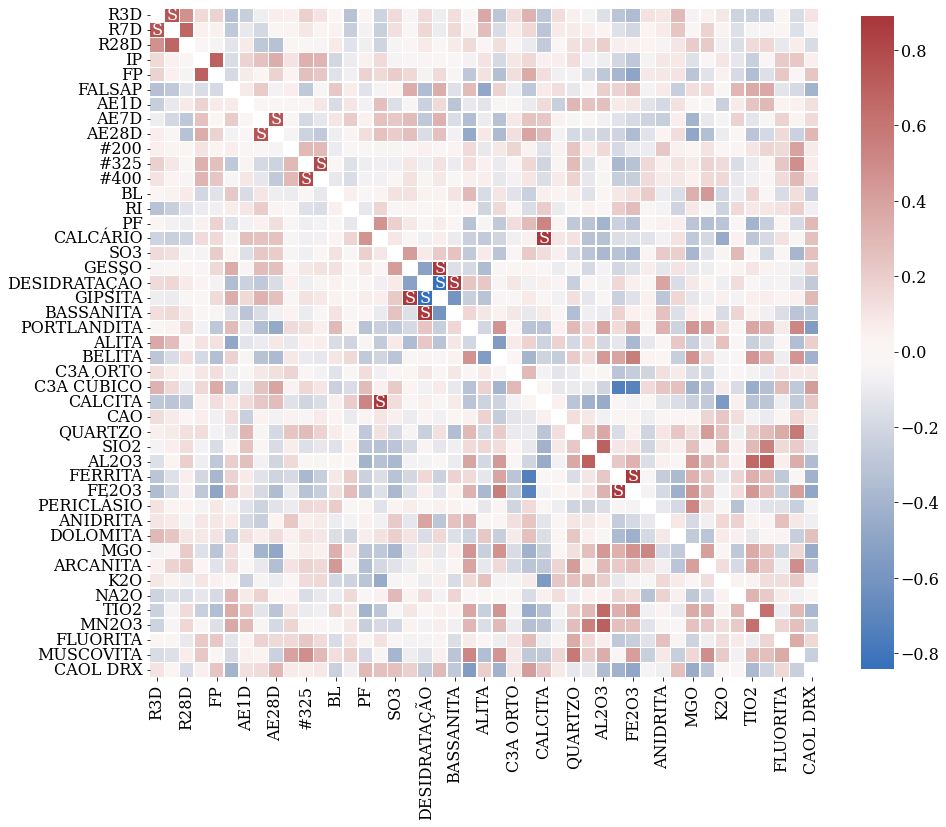

In [34]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) > 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

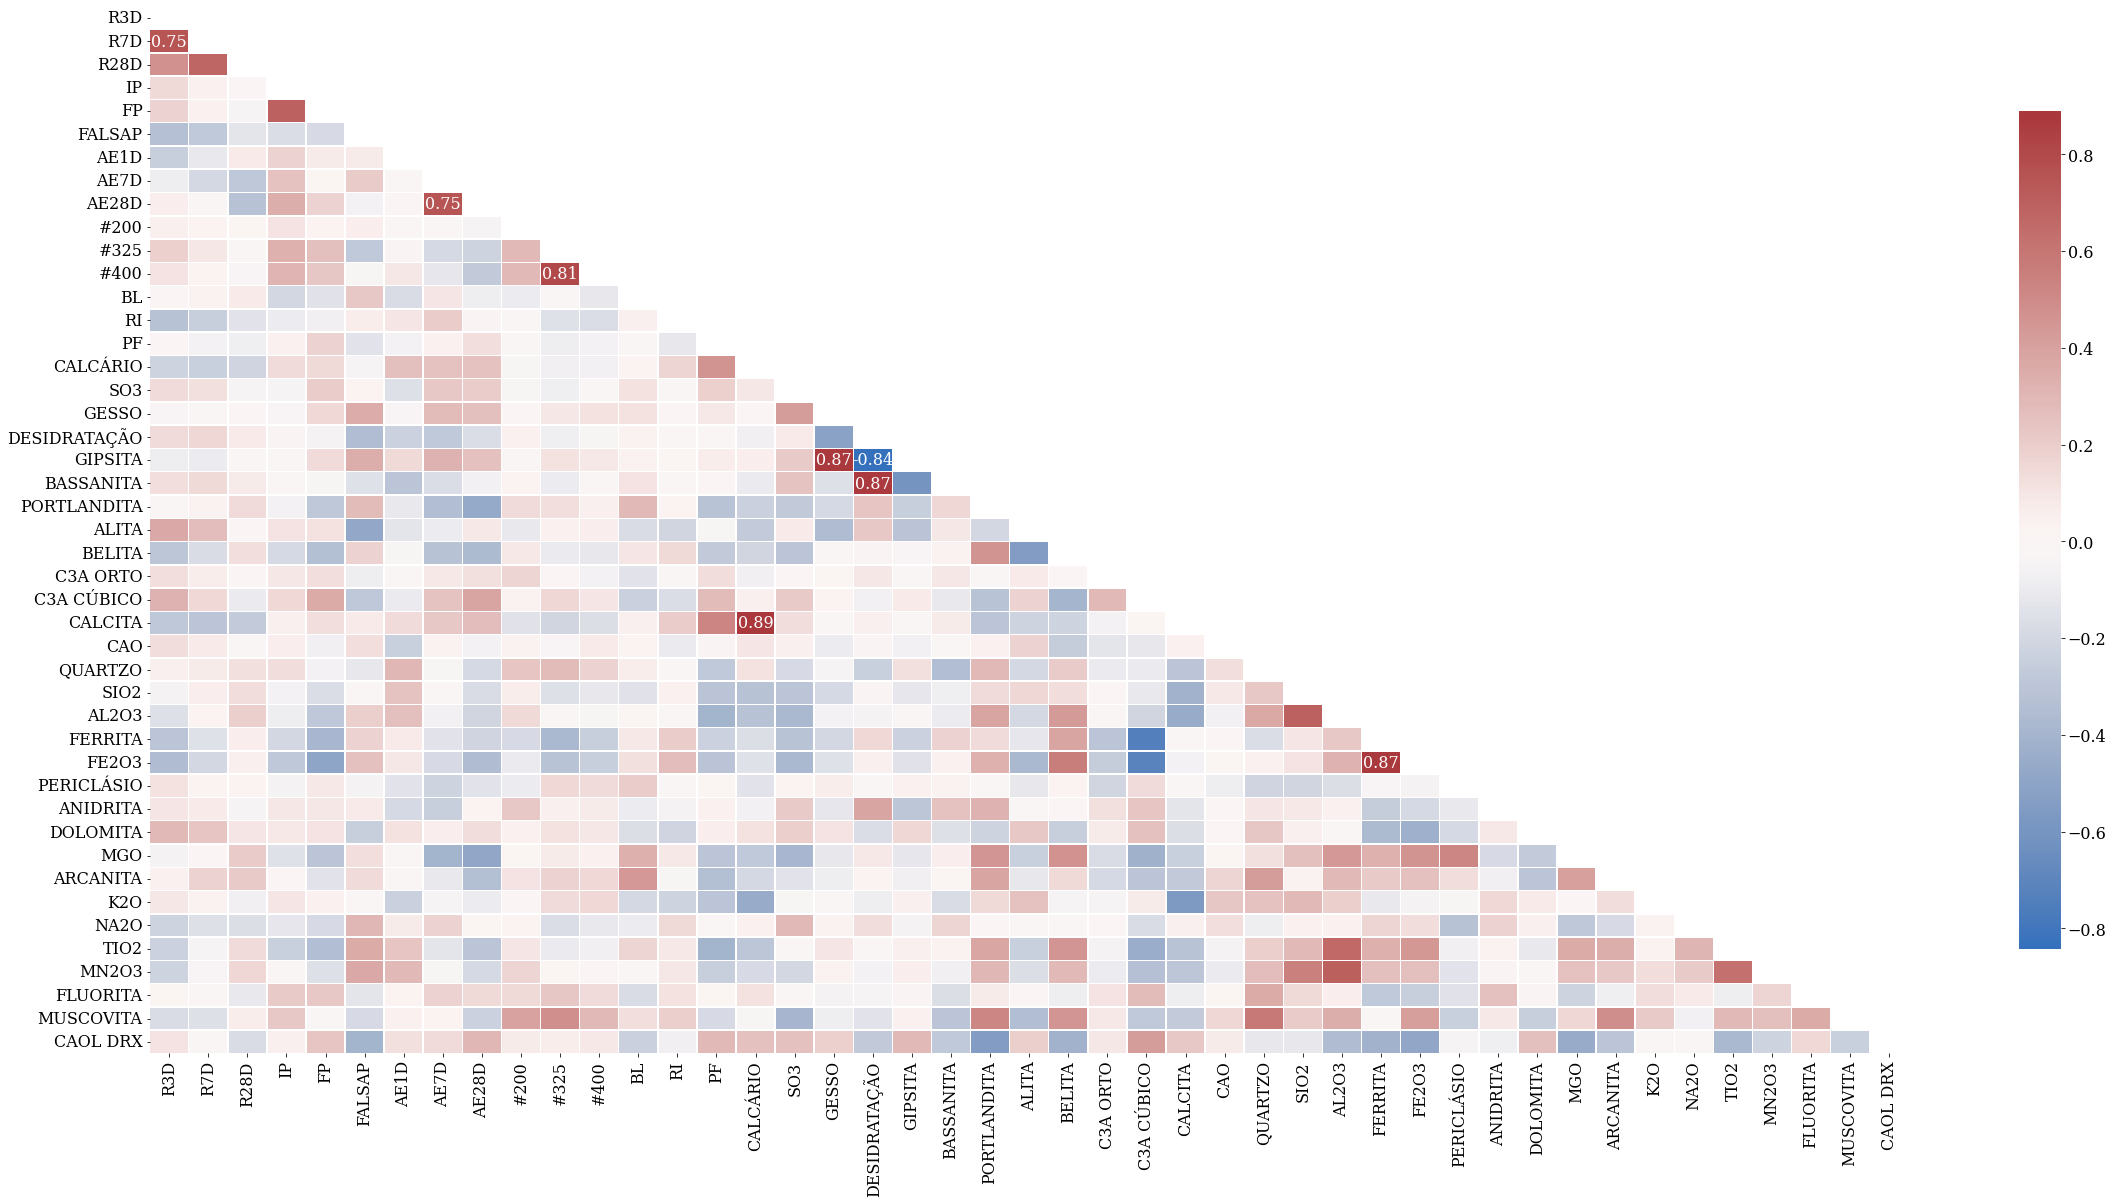

In [35]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) > 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

#plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax
)

plt.tight_layout()

In [36]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    return None

In [37]:
#Few lines solution without redundant pairs of variables:

corr_matrix = df.corr(method="pearson").abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation
sol[sol > 0.75]

CALCÁRIO      CALCITA      0.889139
GESSO         GIPSITA      0.873226
FERRITA       FE2O3        0.869626
DESIDRATAÇÃO  BASSANITA    0.868792
              GIPSITA      0.841888
#325          #400         0.807708
R3D           R7D          0.751261
AE7D          AE28D        0.750663
dtype: float64

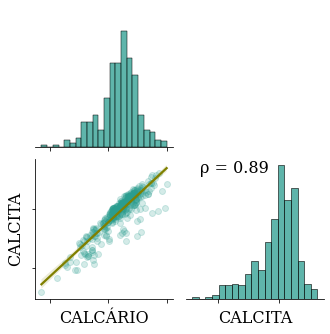

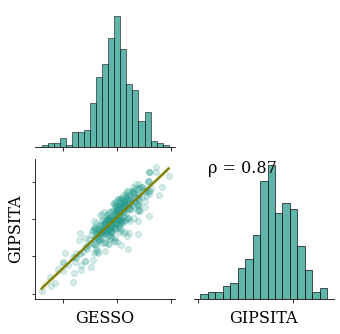

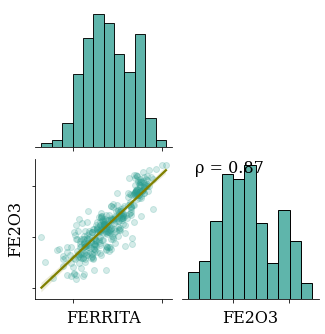

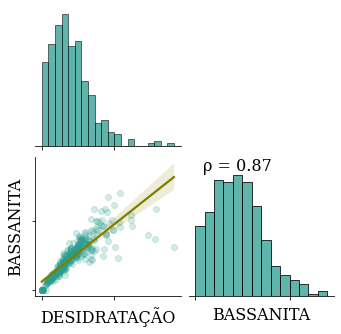

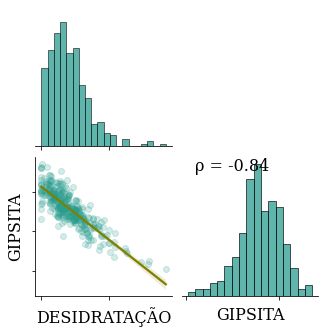

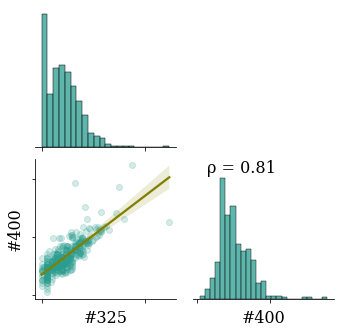

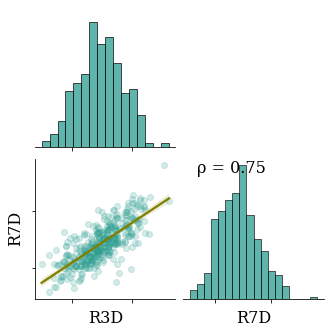

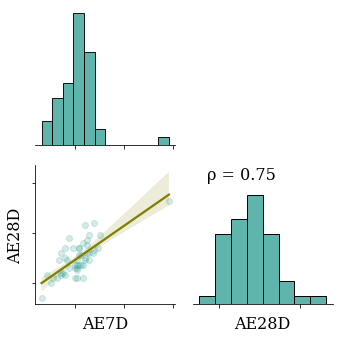

In [38]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind='reg',
            plot_kws={
                'line_kws':{'color':'olive'},
                'scatter_kws': {'alpha': 0.2}
        })
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

# Data/Hora Variable Analyses

In [39]:
df['Data/Hora']

0     2019-01-03
1     2019-01-05
2     2019-01-08
3     2019-01-10
4     2019-01-12
         ...    
410   2021-11-02
411   2021-11-04
412   2021-11-06
413   2021-11-09
414   2021-11-11
Name: Data/Hora, Length: 415, dtype: datetime64[ns]

In [40]:
# How many days are valid datas e.g not weekends
dates = df['Data/Hora'].apply(lambda x: x.date()).unique()
valid_days = np.count_nonzero(np.is_busday(dates.astype('datetime64')))
print(valid_days, "valid days out of", len(dates))

292 valid days out of 410


In [41]:
dates = df['Data/Hora']

In [42]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2019, 2020, 2021}


In [43]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}}

In [44]:
days_each_month_per_year = {}
for year in years:
    for month in months_each_year[year]:
        days_each_month_per_year[str(year) + '-' + str(month)] = [date.day for date in dates if date.year == year and date.month == month]

print("Days of available data for each month each year:")
days_each_month_per_year

Days of available data for each month each year:


{'2019-1': [3, 5, 8, 10, 12, 17, 19, 22, 24, 26, 29, 31],
 '2019-2': [1, 2, 5, 7, 9, 12, 14, 16, 19, 21, 23, 26, 28],
 '2019-3': [1, 2, 5, 7, 9, 12, 14, 16, 19, 21, 23, 26, 27, 28, 30],
 '2019-4': [1, 2, 4, 6, 9, 11, 13, 16, 18, 20, 23, 25, 27, 30],
 '2019-5': [1, 2, 4, 7, 9, 11, 14, 16, 18, 21, 22, 23, 25, 28, 30],
 '2019-6': [1, 4, 6, 8, 11, 13, 15, 18, 19, 22, 25, 27, 29],
 '2019-7': [1, 2, 4, 8, 11, 13, 16, 18, 23, 25, 27, 30, 31],
 '2019-8': [1, 3, 6, 8, 10, 13, 15, 17, 20, 22, 24, 27, 29, 31],
 '2019-9': [1, 3, 5, 6, 7, 9, 10, 11, 12, 14, 17, 19, 21, 24, 26, 27, 28, 29],
 '2019-10': [1, 2, 3, 5, 8, 9, 10, 11, 15, 17, 19, 22, 24, 29, 31],
 '2019-11': [1, 5, 7, 9, 12, 14, 19, 23, 26, 28, 30],
 '2019-12': [1, 3, 5, 7, 10, 12, 14, 17, 19, 21, 27],
 '2020-1': [1, 3, 7, 9, 11, 14, 16, 17, 21, 23, 25, 28, 30],
 '2020-2': [1, 4, 6, 8, 11, 13, 15, 18, 20, 22, 25, 27, 29],
 '2020-3': [3, 5, 7, 10, 12, 13, 17, 19, 21, 24, 26, 28, 31],
 '2020-4': [2, 4, 7, 9, 14, 16, 18, 23, 25, 28, 30],
 '2

In [45]:
# count of days each month per year
count_of_days_each_month_per_year = {}

for year_month, days in days_each_month_per_year.items():
    count_of_days_each_month_per_year[year_month] = len(days)

print("Count of days each month per year:")
count_of_days_each_month_per_year

Count of days each month per year:


{'2019-1': 12,
 '2019-2': 13,
 '2019-3': 15,
 '2019-4': 14,
 '2019-5': 15,
 '2019-6': 13,
 '2019-7': 13,
 '2019-8': 14,
 '2019-9': 18,
 '2019-10': 15,
 '2019-11': 11,
 '2019-12': 11,
 '2020-1': 13,
 '2020-2': 13,
 '2020-3': 13,
 '2020-4': 11,
 '2020-5': 11,
 '2020-6': 12,
 '2020-7': 13,
 '2020-8': 12,
 '2020-9': 14,
 '2020-10': 13,
 '2020-11': 8,
 '2020-12': 8,
 '2021-1': 6,
 '2021-2': 8,
 '2021-3': 13,
 '2021-4': 10,
 '2021-5': 9,
 '2021-6': 11,
 '2021-7': 13,
 '2021-8': 11,
 '2021-9': 11,
 '2021-10': 13,
 '2021-11': 5}

In [46]:
max_obs_key = max(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
max_obs_value = count_of_days_each_month_per_year[max_obs_key]
min_obs_key = min(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
min_obs_value = count_of_days_each_month_per_year[min_obs_key]
print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2021-11 has the minimum number of days with samples - 5
2019-9 has the maximum number of days with samples - 18


In [47]:
mean_obs_per_year = {str(year) : 0 for year in years}

for year, value in count_of_days_each_month_per_year.items():
    mean_obs_per_year[year[:4]] += value

for year, value in months_each_year.items():
    mean_obs_per_year[str(year)] /= len(value)
    mean_obs_per_year[str(year)] = int(mean_obs_per_year[str(year)])
    
print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(np.mean(list(count_of_days_each_month_per_year.values()))))

Mean Number of observations - per year
{'2019': 13, '2020': 11, '2021': 10}

Mean number of observations - all years
11


In [48]:
df['Data/Hora']

0     2019-01-03
1     2019-01-05
2     2019-01-08
3     2019-01-10
4     2019-01-12
         ...    
410   2021-11-02
411   2021-11-04
412   2021-11-06
413   2021-11-09
414   2021-11-11
Name: Data/Hora, Length: 415, dtype: datetime64[ns]

In [49]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(df['Data/Hora'])):
    diffs.append(df['Data/Hora'][i] - df['Data/Hora'][i-1])
diffs

[Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('5 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedel

In [50]:
# Average Frequency
np.mean(diffs)

Timedelta('2 days 12:27:49.565217391')

In [51]:
Counter(diffs)

Counter({Timedelta('2 days 00:00:00'): 218,
         Timedelta('3 days 00:00:00'): 99,
         Timedelta('5 days 00:00:00'): 30,
         Timedelta('1 days 00:00:00'): 31,
         Timedelta('4 days 00:00:00'): 15,
         Timedelta('1 days 13:00:00'): 1,
         Timedelta('0 days 11:00:00'): 1,
         Timedelta('2 days 07:00:00'): 1,
         Timedelta('0 days 17:00:00'): 1,
         Timedelta('6 days 00:00:00'): 3,
         Timedelta('0 days 05:00:00'): 5,
         Timedelta('1 days 19:00:00'): 3,
         Timedelta('4 days 19:00:00'): 2,
         Timedelta('7 days 00:00:00'): 3,
         Timedelta('9 days 00:00:00'): 1})

<AxesSubplot:xlabel='count'>

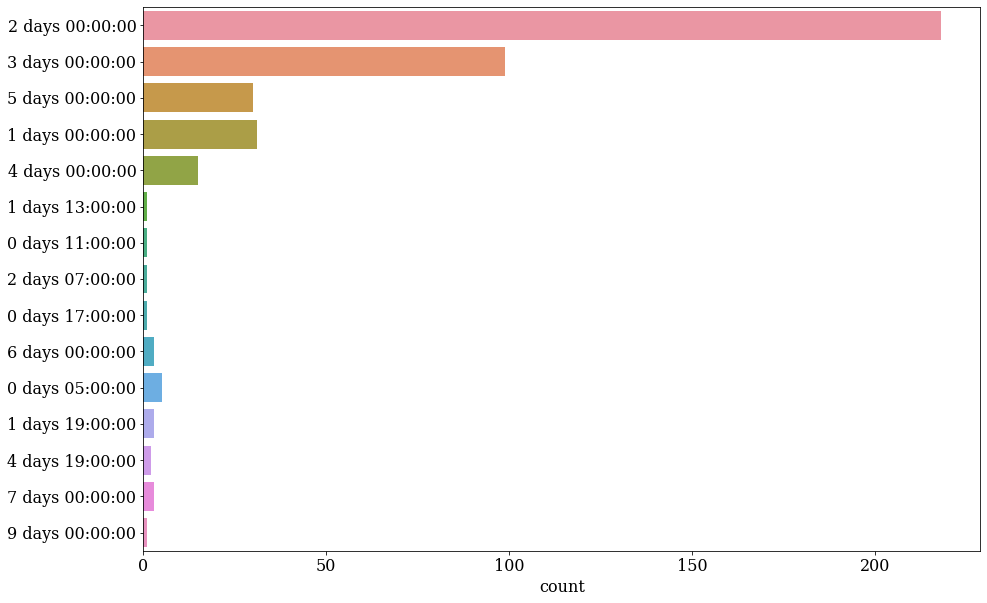

In [52]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [53]:
# Same thing but only with the dates

diffs = []

for i in range(1, len(df['Data/Hora'])):
    diffs.append(df['Data/Hora'][i].date() - df['Data/Hora'][i-1].date())
diffs

[datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(5),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(1),
 datetime.timedelta(1),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(1),
 datetime.timedelta(1),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(1),
 datetime.timedelta(1),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(1),
 datetime.timede

In [54]:
# Average Frequency
np.mean(diffs)

datetime.timedelta(2, 44869, 565217)

In [55]:
Counter(diffs)

Counter({datetime.timedelta(2): 222,
         datetime.timedelta(3): 99,
         datetime.timedelta(5): 32,
         datetime.timedelta(1): 34,
         datetime.timedelta(4): 15,
         datetime.timedelta(6): 3,
         datetime.timedelta(0): 5,
         datetime.timedelta(7): 3,
         datetime.timedelta(9): 1})

<AxesSubplot:xlabel='count'>

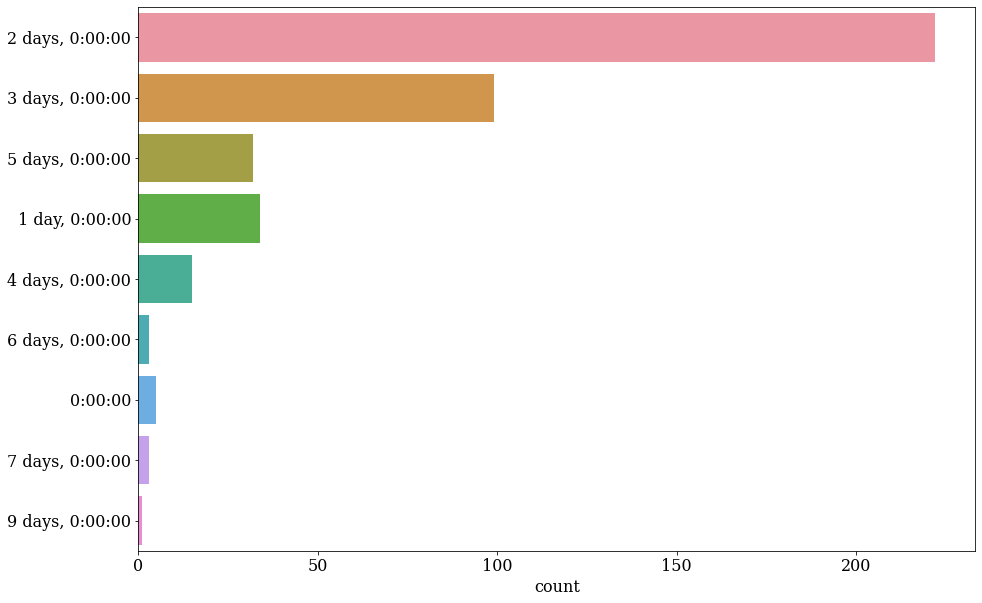

In [56]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y= diffs)

In [57]:
# percent of diffs
[round(val/df.shape[0] *100, 2) for val in list(Counter(diffs).values())]

[53.49, 23.86, 7.71, 8.19, 3.61, 0.72, 1.2, 0.72, 0.24]

In [58]:
df.to_csv('../../../data/raw/partner_i/dados-historicos-partner_i-cement-CPIIF40.csv', index=False)